In [ ]:
# Very rough look at rolands functions

In [1]:
import xarray as xr
import numpy as np

In [23]:
#pings = xr.open_dataset('C:/Local Data/pings/IMOS_SOOP-BA_AE_20200321T230921Z_VJN4147_FV02_Isla-Eden-ES70-38_END-20200331T222858Z_C-20210629T072356Z.nc')

pings = xr.open_dataset('C:/Local Data/pings/IMOS_SOOP-BA_AE_20121107T200400Z_VHGI_FV02_Southern-Champion-ES60-38_END-20121116T212922Z_C-20160222T052633Z.nc',chunks={'TIME':100})

In [24]:
pings

<xarray.Dataset>
Dimensions:                                   (DEPTH: 120, EV_FILENAME: 37, TIME: 3578)
Coordinates:
  * TIME                                      (TIME) datetime64[ns] 2012-11-0...
  * DEPTH                                     (DEPTH) float32 5.0 ... 1.195e+03
  * EV_FILENAME                               (EV_FILENAME) |S256 b'QQQQQQQQQ...
Data variables: (12/48)
    LATITUDE                                  (TIME) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    LATITUDE_quality_control                  (TIME) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    LONGITUDE                                 (TIME) float64 dask.array<chunksize=(100,), meta=np.ndarray>
    LONGITUDE_quality_control                 (TIME) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    Sv                                        (TIME, DEPTH) float32 dask.array<chunksize=(100, 120), meta=np.ndarray>
    Sv_quality_control                        (TIME, DEPTH) float32 dask.array<chunksize=(100, 120), meta=np.ndarray>
    ...                                        ...
    upper_mesopelagic                         (TIME) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    upper_mesopelagic_quality_control         (TIME) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    lower_mesopelagic                         (TIME) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    lower_mesopelagic_quality_control         (TIME) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    day                                       (TIME) float32 dask.array<chunksize=(100,), meta=np.ndarray>
    day_quality_control                       (TIME) float32 dask.array<chunksize=(100,), meta=np.ndarray>
Attributes: (12/145)
    toolbox_input_file:                           Q:\Processed_data\Southern_...
    site_code:                                    SOOP-BA
    EV_csv_file:                                  merge.csv
    platform_code:                                VHGI
    vessel_name:                                  Southern Champion
    vessel_type:                                  Ship, fishing
    ...                                           ...
    data_processing_transceiver_gain:             25.335
    data_processing_sa_correction:                -1.624
    data_processing_absorption_description:       Sound absorption calculated...
    data_processing_soundspeed_description:       Sound speed calculated usin...
    data_processing_transducer_psi:               -19.75
    reporting_id:                                 Southern-Champion_20121107-...

In [5]:
np.nanmedian([np.nan,1,2,3])

2.0

In [19]:
pings.Sv.rolling(DEPTH=10).construct("window_dim").reduce(np.nanmean,dim=('window_dim'))

<xarray.DataArray 'Sv' (TIME: 3578, DEPTH: 120, window_dim: 10)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan, 0.00000000e+00],
        [           nan,            nan,            nan, ...,
                    nan, 0.00000000e+00, 0.00000000e+00],
        [           nan,            nan,            nan, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan, 0.00000000e+00],
        [           nan,            nan,            nan, ...,
                    nan, 0.00000000e+00, 0.00000000e+00],
        [           nan,            nan,            nan, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [4.96135488e-09, 5.00085529e-09, 0.00000000e+00, ...,
         9.28872268e-09, 1.10679235e-08, 1.44774468e-08],
        [5.00085529e-09, 0.00000000e+00, 5.46517853e-09, ...,
         1.10679235e-08, 1.44774468e-08, 1.37031275e-08],
        [0.00000000e+00, 5.46517853e-09, 7.02498060e-09, ...,
         1.44774468e-08, 1.37031275e-08, 1.19224151e-08]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan, 0.00000000e+00],
        [           nan,            nan,            nan, ...,
                    nan, 0.00000000e+00, 2.02848454e-07],
        [           nan,            nan,            nan, ...,
         0.00000000e+00, 2.02848454e-07, 4.34491540e-07],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.08759823e-09, 8.01164823e-09, 9.51823953e-09],
        [0.00000000e+00, 0.00000000e+00, 4.90092322e-09, ...,
         8.01164823e-09, 9.51823953e-09, 6.59798616e-09],
        [0.00000000e+00, 4.90092322e-09, 6.80234891e-09, ...,
         9.51823953e-09, 6.59798616e-09, 0.00000000e+00]]], dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 2012-11-07T20:04:00.499996416 ... 2012-11-...
  * DEPTH    (DEPTH) float32 5.0 15.0 25.0 ... 1.175e+03 1.185e+03 1.195e+03
Dimensions without coordinates: window_dim
Attributes:
    long_name:            mean_volume_backscatter_coefficient
    units:                m-1
    valid_min:            0.0
    valid_max:            1.0
    ancillary_variables:  Sv_quality_control
    quality_control_set:  1.0

C:\Users\mor582\Anaconda3\envs\opencv\lib\site-packages\xarray\core\computation.py:724: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


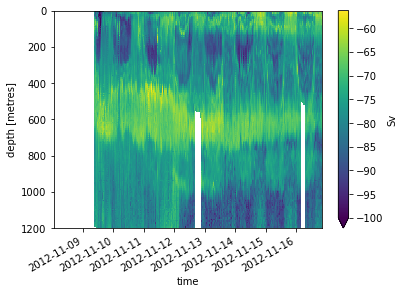

In [8]:
db =10*np.log10(pings.Sv)
db.sel(TIME=slice('2012-11-08 01:00','2012-11-16 20:00')).plot(x='TIME',vmin=-100,ylim=[1200,0])

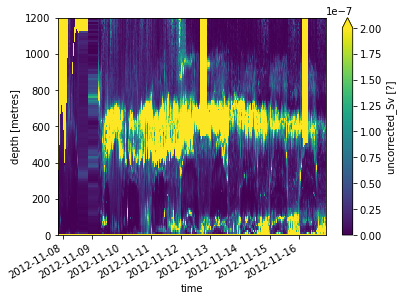

In [447]:
pings.uncorrected_Sv.plot(x='TIME',vmin=0,vmax=0.0000002)

In [448]:
np.log10(pings.Sv).max()

<xarray.DataArray 'Sv' ()>
array(-5.62867165)

In [449]:
pings.DEPTH.diff(dim='DEPTH')

<xarray.DataArray 'DEPTH' (DEPTH: 119)>
array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10.], dtype=float32)
Coordinates:
  * DEPTH    (DEPTH) float32 15.0 25.0 35.0 ... 1.175e+03 1.185e+03 1.195e+03

In [9]:
def binary_signal(Sv,pl,sample_int,min_sep,max_thickness,max_steps = 10):
    '''
    
    desc: generate signal mask based on:
        Proud R, Cox MJ, Wotherspoon S, Brierley AS. 
        A method for identifying Sound Scattering Layers and extracting key characteristics. 
        Methods Ecol Evol 2015;6:1190–8. doi:10.1111/2041-210X.12396.
    
    defined by RP
    
    status: test
    
    '''

    min_sep       = int(min_sep/sample_int) ## in rows
    max_thickness = int(max_thickness/sample_int) ## in rows
    ## set parameters - limited by processing speed
    ## max size > max thickness of SSL
    ## min size = min seperation distance
    sizes = range(min_sep,int(np.ceil(max_thickness/2 + 1.5*min_sep)),min_sep)
    
    ## linear
    linear  = 10**(Sv/10.)
    linear  = np.ma.masked_invalid(linear)
    
    ## min step distance - set to half of shell length
    step         = int(np.ceil(0.5*pl/1000./(sample_int/1500.))) 
    maxL         = max(sizes)
    
    ## create mirrored image
    row,col = linear.shape
    top     = linear[0:maxL,:][::-1]
    bottom  = linear[row-maxL:,:][::-1]
    image   = np.ma.vstack((top,linear,bottom))
    
    ## create signal mask
    signal = np.zeros(linear.shape)
    
    for size1 in sizes:
        step1      = max([int(np.ceil(size1/max_steps)),step]) 
        sizeRange1 = np.arange(step,int(size1)+1,step1)
        ## build sum of levels above pixel
        mu1 = np.zeros((len(sizeRange1),linear.shape[0],linear.shape[1]))
        for k,l in enumerate(sizeRange1):
            mu1[k,:] = image[maxL-l:row + maxL-l,:]
        for size2 in sizes:
            step2      = max([int(np.ceil(size2/max_steps)),step])  
            sizeRange2 = np.arange(step,int(size2)+1,step2)
            ## build sum of levels below pixel
            mu2 = np.zeros((len(sizeRange2),linear.shape[0],linear.shape[1]))
            for k,l in enumerate(-sizeRange2):
                mu2[k,:] = image[maxL-l:row + maxL-l,:]
            # update signal mask ## MEDIAN!!
            sig = (linear > np.ma.median(mu1,axis = 0)) * \
            (linear > np.ma.median(mu2,axis = 0))  ## where pixel value greater then both upper mean and lower mean then classify as signal
            signal[sig == True] = 1 ## update signal mask
    
    return signal

In [10]:
#sv=db #.sel(TIME=slice('2020-03-24 01:00','2020-03-24 20:00'))
sv=db.sel(TIME=slice('2012-11-08 01:00','2012-11-16 20:00'))

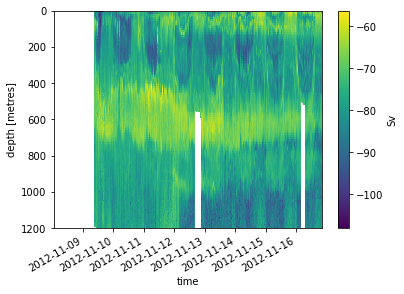

In [11]:
sv.plot(x='TIME',ylim=[1200,0])

In [12]:
pings.attrs['data_processing_transmit_pulse_length']

1.024

In [13]:
## Sv observation parameters
noise_level   = -999   # background noise level (dB re 1m^-1)
#sample_int    = 5      # sample interval (m)
#pl            = 16.384 # pulse length (ms)
#fq            = 12.5   # Frequency

sample_int    = 10      # sample interval (m)
pl            = 1.25  # pulse length (ms)
fq            = 38     # Frequency

## SSLEM optimization parameters (recomended setting for regional analysis)
#min_sep       = 20     # minimum SSL seperation (m):min = pulse length
#max_thickness = 300    # Maximun SSL thickness  (m)
#min_size      = 100    # Minimum duration of SSL (pings)
#min_thickness = 50     # Minimun thickness of SSL (m)


## SSLEM optimization parameters (recomended setting for regional analysis)
min_sep       = 50     # minimum SSL seperation (m):min = pulse length
max_thickness = 600    # Maximun SSL thickness  (m)
min_size      = 300    # Minimum duration of SSL (pings)
min_thickness = 100     # Minimun thickness of SSL (m)


## thresholds 
minSv = -90
maxSv = -50

############################################################################### SSLEM
## NOTE: the order of these steps is important

## calculate number of rows/samples from meters
min_thickness_rows = int(min_thickness/sample_int)
min_sep_rows       = int(min_sep/sample_int)

In [14]:
b =binary_signal(sv.T,pings.attrs['data_processing_transmit_pulse_length'],sample_int,min_sep,max_thickness,max_steps = 10)

In [15]:
from scipy import ndimage
def median_1D_filter(data,window_size,error_value = 0):
    '''
    Running 1D median filter on masked data, width = window_size
    Return error_value where less than 3 data values
    '''
    ## make window odd
    if window_size%2 == 0:
        window_size = window_size +1 ## odd
    ## set min size of window to 3
    window_size = max([window_size,3]) ## min
    ## size of window to the left/right of evaluted pixel
    size   = int(window_size/2)
    ## add mask
    data   = np.ma.masked_invalid(data)  
    result = []
    ## calculate median for rolling window
    ## if  less than 3 data values in window return error_value
    for i in range(size):        
        window      = data[0:size+i]
        window_data = window[window.mask == False]
        if len(window_data) > 2:
            result.append(np.median(window_data))
        else:
            result.append(error_value)
    for i in range(len(data) - 2*size):
        window      = data[i:i+2*size+1]
        window_data = window[window.mask == False]
        if len(window_data) > 2:
            result.append(np.median(window_data))
        else:
            result.append(error_value)           
    for i in range(size):
        window      = data[-2*size+i:]
        window_data = window[window.mask == False]
        if len(window_data) > 2:
            result.append(np.median(window_data))
        else:
            result.append(error_value)
        
    return np.array(result)


def feature_median(Sv,mask,noise_level = -999):
    '''
    for each flagged mask component, calculates median Sv value
    '''
    Sv = np.ma.masked_where(Sv == noise_level,Sv)
    Sv_median = np.ones(mask.shape) * noise_level
    
    for label in np.unique(mask)[1:]:
        idx = np.where(mask == label)
        Sv_median[idx] = np.ma.median(Sv[idx])
        
    return Sv_median


def fill_feature_gaps(mask,max_gap_size = 1000):
    '''
    fill internal gaps of features up to a max size of 
    max_gap_size (in pixels)
    '''
    invert_mask          = np.zeros(mask.shape)
    invert_mask[mask==0] = 1
    invert_mask[mask==1] = 0
    ## fill gaps
    invert_mask = flag(invert_mask,max_gap_size)
    mask[invert_mask == 0] = 1
    
    return mask

def vertical_merge(mask,min_sep):
    '''
    Merge features where distance (in pixels) is less than
    min_sep
    '''
    size    = int(min_sep)
    row,col = mask.shape
    mask2   = np.zeros(mask.shape)
    for asize in range(1,size):
        bsize = size - asize
        above = np.zeros((row-2*size,col))
        below = np.zeros((row-2*size,col))
        for i in range(asize):
            above += mask[size-i-1:row-size-i-1,:]
        for i in range(bsize):   
            below += mask[size + 1 + i:row-size+i+1,:]            
        above[above > 0] = 1 
        below[below > 0] = 1
        mask2[size:row-size,:][(above + below) == 2] = 1
    
    return mask2


def label_ping(ping_mask):
    '''
    label (flag) each seperate feature, 
    defined as signal regions divided by noise, of a single ping
    '''
    ## blank
    ping_label = np.zeros(ping_mask.shape)
    
    ## signal
    idx = np.where(ping_mask > 0)[0]
    
    ## if no signal exit
    if len(idx) == 0:
        return ping_label
    
    ## label each feature
    label = 1
    vals  = [idx[0]]
    for k,i in enumerate(idx[1:]):
        if i != idx[k] + 1:
            ping_label[vals] = label
            label += 1
            vals = [i]
        else:
            vals.append(i)
    ## last one
    ping_label[vals] = label
    return ping_label


def break_mask(mask):
    '''
    break a mask into individual features (no vertical gaps in signal)
    '''
    
    mask[mask > 0]     = 1
    row,col            = mask.shape
    prev_col           = label_ping(mask[:,0])
    labelled_mask      = np.zeros(mask.shape)
    labelled_mask[:,0] = prev_col 
    for c in range(1,col):
        next_col        = label_ping(mask[:,c])
        all_connections = []
        for next_feature in np.unique(next_col)[1:]:
            connections = []
            next_idx = np.where(next_col == next_feature)[0]
            for prev_feature in np.unique(prev_col)[1:]:
                prev_idx = np.where(prev_col == prev_feature)[0]
                for i in next_idx:
                    if i in prev_idx:
                        connections.append(prev_feature)
                        break
            all_connections.append(connections)
        for k,con in enumerate(all_connections):
            new = False
            if len(con) == 1:
                for k2,con2 in enumerate(all_connections):
                    if k == k2:
                        continue
                    if con[0] in con2:
                        new = True
            else:## new connection
                new = True
            idx = np.where(next_col == k+1)[0]
            if new:            
                labelled_mask[idx,c] = np.max(labelled_mask) + 1
            else:
                labelled_mask[idx,c] = con[0]
        prev_col = labelled_mask[:,c]
        
    return labelled_mask


def flag(mask,min_agg_size = 0,struct = None):
    """
    remove small aggregates and label others
    """
    structure=[[1,1,1],
               [1,1,1],
               [1,1,1]]
    if struct != None:
        structure == struct
    
    ## label image
    label_im, nb_labels    = ndimage.label(np.asfarray(mask),structure)
    
    return remove_features(label_im, min_agg_size)

def remove_features(label_im, min_agg_size = 0):
    '''
    remove masked features smaller than min_agg_size (in pixels)
    '''
    mask                   = np.zeros(label_im.shape)
    mask[label_im > 0]     = 1
    sizes                  = ndimage.sum(mask, label_im, range(len(np.unique(label_im))))
    mask_size              = sizes < min_agg_size
    remove_pixel           = mask_size[label_im]
    label_im[remove_pixel] = 0
    labels                 = np.unique(label_im)
    label_clean            = np.searchsorted(labels, label_im)
    
    return label_clean

In [16]:
f=fill_feature_gaps(b)

In [17]:
fp = xr.DataArray(f,dims=sv.dims)

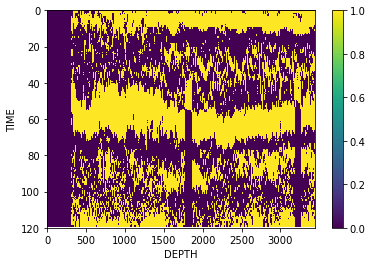

In [18]:
fp.plot(ylim=[120,0])

In [461]:
def signal_row_filter(mask,window,threshold = 0.5):
    '''
    :param Sv: gridded Sv values (dB re 1m^-1)
    :type  Sv: numpy.array
    
    :param window: size in numbwer of pings/columns of analysis window
    :type  window: int
    
    :param threshold: value between 0 and 1, proportion of window required 
                        to assign as signal value
    :type  threshold: float
    
    :param noise_level: level of background noise (db re 1m^-1)
    :type  noise_level: float

    desc: isolate signal rows
    
    defined by RP
    
    status: dev
    '''
    window        = int(window)
    row,col       = mask.shape
    filtered_mask = np.zeros((mask.shape))
    mask_sum      = np.zeros((row,col-window+1))
    for i in range(window):
        mask_sum += mask[:,i:col-(window-i-1)]
    ##
    mask_sum[mask_sum <= (window*threshold)] = 0  # noise
    mask_sum[mask_sum > (window*threshold)]  = 1  # signal
    for i in range(window):
        filtered_mask[:,i:col-(window-i-1)] += mask_sum
    filtered_mask[filtered_mask > 0] = 1
        
    #for r in range(row):
    #    for c in range(int(window/2),int(col-window/2) +1,1):
    #        col_weight = sum(mask[r,c-int(window/2):c+int(window/2)+1])
    #        if col_weight > (window*threshold):
    #            filtered_mask[r,c-int(window/2):c+int(window/2)+1] = 1
                
    return filtered_mask

def signal_column_filter(mask,window,threshold = 0.5):
    '''
    :param Sv: gridded Sv values (dB re 1m^-1)
    :type  Sv: numpy.array
    
    :param window: size in numbwer of samples/rows of analysis window
    :type  window: int
    
    :param threshold: value between 0 and 1, proportion of window required 
                        to assign as signal value
    :type  threshold: float
    
    :param noise_level: level of background noise (db re 1m^-1)
    :type  noise_level: float

    desc: isolate signal rows
    
    defined by RP
    
    status: dev
    '''
    #if erosion:
    window        = int(window) 
    row,col       = mask.shape
    filtered_mask = np.zeros((mask.shape))
    mask_sum      = np.zeros((row-window+1,col))
    for i in range(window):
        mask_sum += mask[i:row-(window-i-1),:]
    ## 
    mask_sum[mask_sum < (window*threshold)] = 0  # noise
    mask_sum[mask_sum >= (window*threshold)]  = 1  # signal
    for i in range(window):
        filtered_mask[i:row-(window-i-1),:] += mask_sum
    filtered_mask[filtered_mask > 0] = 1
    ## extend
    #top      = mask_sum[0:int(window/2),:]
    #bottom   = mask_sum[(row - window - int(window/2)):,:]
    #mask_sum = np.vstack((top,mask_sum,bottom))

    
    ## create mask
    #filtered_mask[mask_sum > (window*threshold)] = 1
    #else:
    #    row,col       = mask.shape
    #    filtered_mask = np.zeros((mask.shape))
    #    for c in range(col):
    #        for r in range(int(window/2),int(row-window/2) +1,1):
    #            row_weight = sum(mask[r-int(window/2):r+int(window/2)+1,c])
    #            if row_weight > (window*threshold):
    #                filtered_mask[r-int(window/2):r+int(window/2)+1,c] = 1
                
    return filtered_mask


def remove_noise(mask,noise_mask):
    '''
    '''
    mask[noise_mask == 0] = 0
    return mask

def get_signal_mask(Sv,noise_level = -999):
    '''
    '''
    signal_mask                    = np.ones((Sv.shape))
    signal_mask[Sv == noise_level] = 0
    return signal_mask


def merge_binary(masks):
    '''
    :param masks: list of masks              
    :type  masks: list[numpy.array,...]
    
    :return
    :param output_mask: mask of integers, base2 binary representation of each integer 
                        corresponds to value of each mask input, in the same order.
                        e.g. '0101011', is represented by a unique integer, 43 and 
                        correspond to mask values of 0 for the first mask, 1 for the 
                        second mask etc.
    :type  output_mask: numpy.array of integers
    
    NOTE: the shape of the mask is determined by the first mask in the list
          all masks should have the same number of columns/pings
    
    '''
    ## create array of strings using first mask
    output_mask     = masks[0].astype('S1')
    out_row,out_col = output_mask.shape
    
    for m in masks[1:]:
        row,col                              = m.shape
        mask_new                             = np.zeros((out_row,out_col)) 
        mask_new[0:min(row,out_row),:]       = m[0:min(row,out_row),:]           
        output_mask                          = np.core.defchararray.add\
        (output_mask, mask_new.astype('S1'))
    ## change to integers base 2
    output_mask = np.reshape(np.array([int(x,2) for x in \
                                       output_mask.flatten()]),output_mask.shape)
    
    return output_mask
    
    
    
    

In [462]:
signal = signal_row_filter(b,min_size,threshold = 0.5) 
signal = signal_column_filter(signal,min_thickness_rows,threshold = 1)
signal = flag(signal,min_size*min_thickness_rows)
signal[signal > 0] = 1
signal             = vertical_merge(signal,min_sep_rows)
signal = fill_feature_gaps(signal,min_size*min_thickness_rows)
signal = break_mask(signal)
signal = remove_features(signal.astype(int),min_size*min_thickness_rows)

In [463]:
signal = xr.DataArray(signal.T,dims=sv.dims)

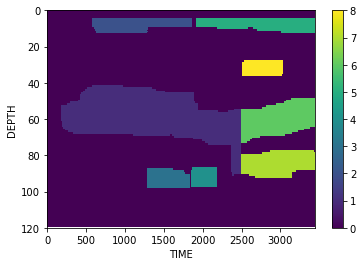

In [464]:
signal.plot(x='TIME',ylim=[120,0])

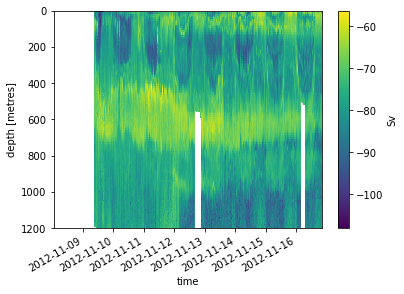

In [465]:
sv.plot(x='TIME',ylim=[1200,0])